In [10]:
import os
import pandas as pd
path = r"C:\Users\Wong\Desktop\Dissertation\Imputed_dataset"

Acomb_water = pd.read_csv(os.path.join(path, 'Acomb_water.csv'))
Acomb_rainfall = pd.read_csv(os.path.join(path, 'Acomb_rainfall.csv'))

In [11]:
Acomb_water['dateTime'] = pd.to_datetime(Acomb_water['dateTime'])
Acomb_rainfall['dateTime'] = pd.to_datetime(Acomb_rainfall['dateTime'])

In [12]:
Acomb_water.set_index('dateTime', inplace=True)
Acomb_rainfall.set_index('dateTime', inplace=True)

In [13]:
start_date = pd.to_datetime('01/01/2017 00:00:00', format='%d/%m/%Y %H:%M:%S')
end_date = pd.to_datetime('31/12/2020 00:00:00', format='%d/%m/%Y %H:%M:%S')
Acomb_water_subset = Acomb_water.loc[(Acomb_water.index >= start_date) & (Acomb_water.index <= end_date)]
Acomb_rainfall_subset = Acomb_rainfall.loc[(Acomb_rainfall.index >= start_date) & (Acomb_rainfall.index <= end_date)]

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
merged_data = pd.merge(Acomb_rainfall_subset, Acomb_water_subset, on='dateTime', how='inner')

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_data = scaler.fit_transform(merged_data)

In [17]:
train_data = merged_data[:90136]
test_data = merged_data[90136:]

In [9]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
lr_acomb_96in_48out = LinearRegression()
cv_scores_acomb_96in_48out_lr = cross_val_score(lr_acomb_96in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [12]:
cv_scores_acomb_96in_48out_lr = -cv_scores_acomb_96in_48out_lr
print("Cross-validation scores:")
print(cv_scores_acomb_96in_48out_lr)
print("Mean MSE:", cv_scores_acomb_96in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_acomb_96in_48out_lr.std())

Cross-validation scores:
[0.00055211 0.00142171 0.00017293 0.00089417 0.00037005]
Mean MSE: 0.0006821928328059953
Standard Deviation MSE: 0.00043943901129159767


In [13]:
window_size = 48
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [14]:
lr_acomb_48in_48out = LinearRegression()
cv_scores_acomb_48in_48out_lr = cross_val_score(lr_acomb_48in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [15]:
cv_scores_acomb_48in_48out_lr = -cv_scores_acomb_48in_48out_lr
print("Cross-validation scores:")
print(cv_scores_acomb_48in_48out_lr)
print("Mean MSE:", cv_scores_acomb_48in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_acomb_48in_48out_lr.std())

Cross-validation scores:
[0.00067226 0.0014244  0.00018204 0.00094027 0.00037032]
Mean MSE: 0.0007178562930301444
Standard Deviation MSE: 0.00043786565058025797


In [16]:
window_size = 24
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [17]:
lr_acomb_24in_48out = LinearRegression()
cv_scores_acomb_24in_48out_lr = cross_val_score(lr_acomb_24in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [18]:
cv_scores_acomb_24in_48out_lr = -cv_scores_acomb_24in_48out_lr
print("Cross-validation scores:")
print(cv_scores_acomb_24in_48out_lr)
print("Mean MSE:", cv_scores_acomb_24in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_acomb_24in_48out_lr.std())

Cross-validation scores:
[0.0007035  0.00144093 0.00018709 0.00097433 0.00038009]
Mean MSE: 0.0007371878976748585
Standard Deviation MSE: 0.00044334132497930934


Now try the different window size 24,48,96 for 32output

In [19]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [20]:
lr_acomb_96in_32out = LinearRegression()
cv_scores_acomb_96in_32out_lr = cross_val_score(lr_acomb_96in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [21]:
cv_scores_acomb_96in_32out_lr = -cv_scores_acomb_96in_32out_lr
print("Cross-validation scores:")
print(cv_scores_acomb_96in_32out_lr)
print("Mean MSE:", cv_scores_acomb_96in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_acomb_96in_32out_lr.std())

Cross-validation scores:
[0.00050117 0.00100721 0.00011872 0.00057541 0.00025146]
Mean MSE: 0.0004907937815609236
Standard Deviation MSE: 0.0003064869874473991


In [22]:
window_size = 48
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [23]:
lr_acomb_48in_32out = LinearRegression()
cv_scores_acomb_48in_32out_lr = cross_val_score(lr_acomb_48in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [24]:
cv_scores_acomb_48in_32out_lr = -cv_scores_acomb_48in_32out_lr
print("Cross-validation scores:")
print(cv_scores_acomb_48in_32out_lr)
print("Mean MSE:", cv_scores_acomb_48in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_acomb_48in_32out_lr.std())

Cross-validation scores:
[0.00055276 0.00100716 0.00012342 0.00059931 0.00025235]
Mean MSE: 0.0005070023185774151
Standard Deviation MSE: 0.0003074929213003086


In [25]:
window_size = 24
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [26]:
lr_acomb_24in_32out = LinearRegression()
cv_scores_acomb_24in_32out_lr = cross_val_score(lr_acomb_24in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [27]:
cv_scores_acomb_24in_32out_lr = -cv_scores_acomb_24in_32out_lr
print("Cross-validation scores:")
print(cv_scores_acomb_24in_32out_lr)
print("Mean MSE:", cv_scores_acomb_24in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_acomb_24in_32out_lr.std())

Cross-validation scores:
[0.00055553 0.00101021 0.00012596 0.00061815 0.00025998]
Mean MSE: 0.000513966149454063
Standard Deviation MSE: 0.0003078626360163598


Now try the different window size 24,48,96 for 16output

In [28]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [29]:
lr_acomb_96in_16out = LinearRegression()
cv_scores_acomb_96in_16out_lr = cross_val_score(lr_acomb_96in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [32]:
cv_scores_acomb_96in_16out_lr = -cv_scores_acomb_96in_16out_lr
print("Cross-validation scores:")
print(cv_scores_acomb_96in_16out_lr)
print("Mean MSE:", cv_scores_acomb_96in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_acomb_96in_16out_lr.std())

Cross-validation scores:
[3.07531537e-04 4.14735863e-04 6.00774090e-05 2.43532855e-04
 1.15626584e-04]
Mean MSE: 0.0002283008496581207
Standard Deviation MSE: 0.00012826702323055525


In [33]:
window_size = 48
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [34]:
lr_acomb_48in_16out = LinearRegression()
cv_scores_acomb_48in_16out_lr = cross_val_score(lr_acomb_48in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [35]:
cv_scores_acomb_48in_16out_lr = -cv_scores_acomb_48in_16out_lr
print("Cross-validation scores:")
print(cv_scores_acomb_48in_16out_lr)
print("Mean MSE:", cv_scores_acomb_48in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_acomb_48in_16out_lr.std())

Cross-validation scores:
[3.09903325e-04 4.13069781e-04 6.05132307e-05 2.49849848e-04
 1.17200540e-04]
Mean MSE: 0.00023010734480063827
Standard Deviation MSE: 0.000127861275015485


In [36]:
window_size = 24
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [37]:
lr_acomb_24in_16out = LinearRegression()
cv_scores_acomb_24in_16out_lr = cross_val_score(lr_acomb_24in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [38]:
cv_scores_acomb_24in_16out_lr = -cv_scores_acomb_24in_16out_lr
print("Cross-validation scores:")
print(cv_scores_acomb_24in_16out_lr)
print("Mean MSE:", cv_scores_acomb_24in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_acomb_24in_16out_lr.std())

Cross-validation scores:
[3.20892110e-04 4.14860120e-04 6.06733863e-05 2.53036057e-04
 1.21584270e-04]
Mean MSE: 0.00023420918877616243
Standard Deviation MSE: 0.00012907531594297868


Now try the different window size 24,48,96 for 8output

In [39]:
window_size = 96
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [40]:
lr_acomb_96in_8out = LinearRegression()
cv_scores_acomb_96in_8out_lr = cross_val_score(lr_acomb_96in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [51]:
cv_scores_acomb_96in_8out_lr = -cv_scores_acomb_96in_8out_lr
print("Cross-validation scores:")
print(cv_scores_acomb_96in_8out_lr)
print("Mean MSE:", cv_scores_acomb_96in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_acomb_96in_8out_lr.std())

Cross-validation scores:
[1.39472062e-04 1.40964144e-04 2.11067887e-05 9.87055210e-05
 5.36985830e-05]
Mean MSE: 9.078941977942398e-05
Standard Deviation MSE: 4.728967439408146e-05


In [44]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [45]:
lr_acomb_48in_8out = LinearRegression()
cv_scores_acomb_48in_8out_lr = cross_val_score(lr_acomb_48in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [46]:
cv_scores_acomb_48in_8out_lr = -cv_scores_acomb_48in_8out_lr
print("Cross-validation scores:")
print(cv_scores_acomb_48in_8out_lr)
print("Mean MSE:", cv_scores_acomb_48in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_acomb_48in_8out_lr.std())

Cross-validation scores:
[1.37977280e-04 1.39210983e-04 2.09497076e-05 1.00282460e-04
 5.41967795e-05]
Mean MSE: 9.052344189178875e-05
Standard Deviation MSE: 4.664271153420871e-05


In [48]:
window_size = 24
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [49]:
lr_acomb_24in_8out = LinearRegression()
cv_scores_acomb_24in_8out_lr = cross_val_score(lr_acomb_24in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [50]:
cv_scores_acomb_24in_8out_lr = -cv_scores_acomb_24in_8out_lr
print("Cross-validation scores:")
print(cv_scores_acomb_24in_8out_lr)
print("Mean MSE:", cv_scores_acomb_24in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_acomb_24in_8out_lr.std())

Cross-validation scores:
[1.41355739e-04 1.39830856e-04 2.09386424e-05 1.01147681e-04
 5.55923580e-05]
Mean MSE: 9.177305520956198e-05
Standard Deviation MSE: 4.729151134533868e-05


Use grid search to find the best parameters for the selected window size of different output size

In [ ]:
cv_scores_acomb_96in_48out_lr

In [ ]:
cv_scores_acomb_96in_32out_lr

In [ ]:
cv_scores_acomb_96in_16out_lr

In [ ]:
cv_scores_acomb_48in_8out_lr

In [78]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [58]:
lr_acomb_96in_48out = LinearRegression()

In [59]:
lr_acomb_96in_48out.fit(X_train, y_train)

LinearRegression()

In [60]:
pred_lr_acomb_96in_48out = lr_acomb_96in_48out.predict(X_test)

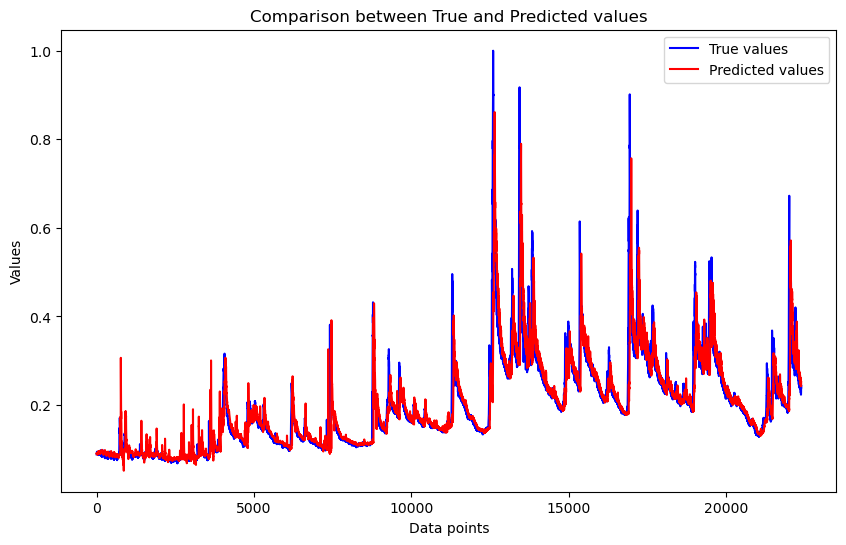

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_acomb_96in_48out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [61]:
def nse(y_test, pred_lr_acomb_96in_48out):
    numerator = np.sum((y_test - pred_lr_acomb_96in_48out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_acomb_96in_48out)
mae = mean_absolute_error(y_test, pred_lr_acomb_96in_48out)
nse_value = nse(y_test, pred_lr_acomb_96in_48out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0028779212139410895
MAE: 0.02292295514795869
NSE: 0.7397127758588298


In [62]:
from joblib import dump
dump(lr_acomb_96in_48out, 'lr_acomb_96in_48out.joblib')

['lr_acomb_96in_48out.joblib']

In [80]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [64]:
lr_acomb_96in_32out = LinearRegression()
lr_acomb_96in_32out.fit(X_train, y_train)

LinearRegression()

In [65]:
pred_lr_acomb_96in_32out = lr_acomb_96in_32out.predict(X_test)

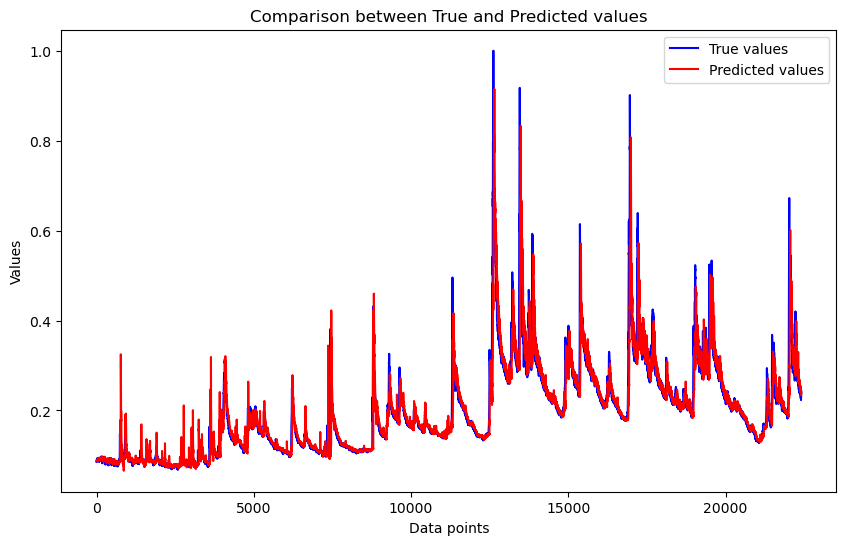

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_acomb_96in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [66]:
def nse(y_test, pred_lr_acomb_96in_32out):
    numerator = np.sum((y_test - pred_lr_acomb_96in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_acomb_96in_32out)
mae = mean_absolute_error(y_test, pred_lr_acomb_96in_32out)
nse_value = nse(y_test, pred_lr_acomb_96in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0018727981686845344
MAE: 0.017462880031429564
NSE: 0.8306353135032707


In [67]:
from joblib import dump
dump(lr_acomb_96in_32out, 'lr_acomb_96in_32out.joblib')

['lr_acomb_96in_32out.joblib']

In [82]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [69]:
lr_acomb_96in_16out = LinearRegression()
lr_acomb_96in_16out.fit(X_train, y_train)

LinearRegression()

In [70]:
pred_lr_acomb_96in_16out = lr_acomb_96in_16out.predict(X_test)

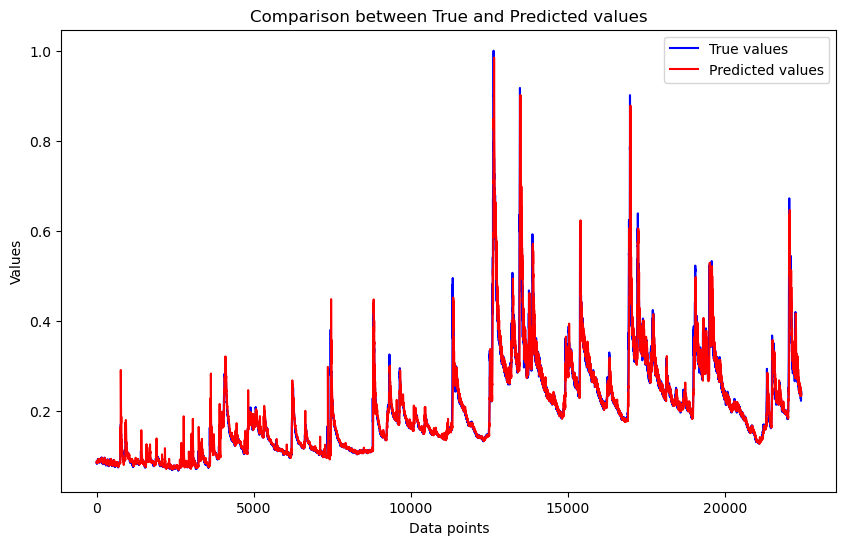

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_acomb_96in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [71]:
def nse(y_test, pred_lr_acomb_96in_16out):
    numerator = np.sum((y_test - pred_lr_acomb_96in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_acomb_96in_16out)
mae = mean_absolute_error(y_test, pred_lr_acomb_96in_16out)
nse_value = nse(y_test, pred_lr_acomb_96in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0007654028267513154
MAE: 0.010810766924341
NSE: 0.930790897381566


In [72]:
from joblib import dump
dump(lr_acomb_96in_16out, 'lr_acomb_96in_16out.joblib')

['lr_acomb_96in_16out.joblib']

In [18]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [20]:
from sklearn.linear_model import LinearRegression
lr_acomb_48in_8out = LinearRegression()
lr_acomb_48in_8out.fit(X_train, y_train)

LinearRegression()

In [21]:
pred_lr_acomb_48in_8out = lr_acomb_48in_8out.predict(X_test)

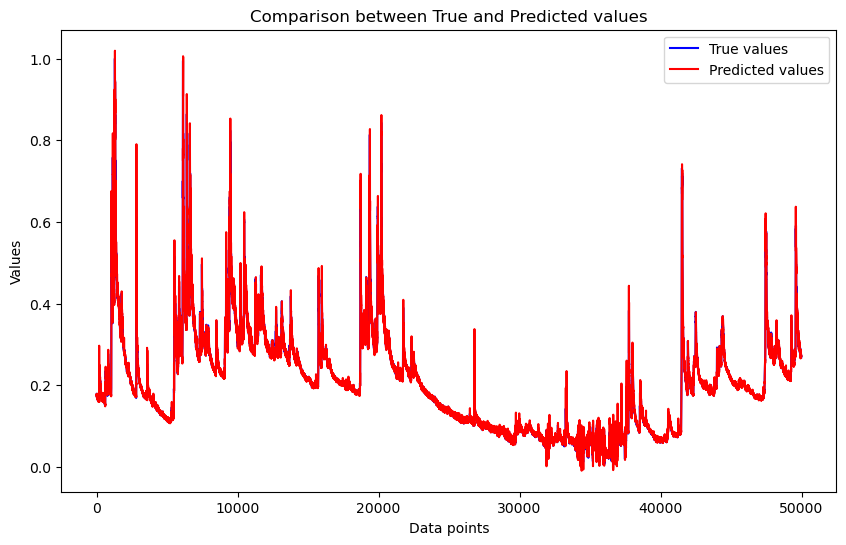

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_acomb_48in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [23]:
def nse(y_test, pred_lr_acomb_48in_8out):
    numerator = np.sum((y_test - pred_lr_acomb_48in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_acomb_48in_8out)
mae = mean_absolute_error(y_test, pred_lr_acomb_48in_8out)
nse_value = nse(y_test, pred_lr_acomb_48in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.00023719494850091364
MAE: 0.006242368342648961
NSE: 0.9833413583885688


In [25]:
from joblib import dump
dump(lr_acomb_48in_8out, 'lr_acomb_48in_8out.joblib')

['lr_acomb_48in_8out.joblib']